### Analysis of ribosome profiling high-throughput sequencing data.
### There are 10 datasets. Five are total RNA sequencing reads mapped to human transcriptome, and the other five are ribosome protected fragments mapped to human transcriptome. The sequencing data were obtained from five samples, cells without infection (mock), cells infected by wild-type viruses, and cells infected by three types of mutant viruses. The samples were harvested at 24 h.p.i..
### This notebook explores the datasets, trying to understand whether virus (including mutant strains) infection affects the translation of host mRNA.

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data files for the mock sample.

In [12]:
df_nlist = pd.read_excel('./gene list_GTF_84.xlsx', names=('id', 'name'))

In [204]:
df_rna1 = pd.read_csv('./RNA1', sep='\t', names=('id', 'rna_cnt'), skipfooter=5, engine='python')
df_rpf1 = pd.read_csv('./RPF1', sep='\t', names=('id', 'rpf_cnt'), skipfooter=5, engine='python')

In [205]:
df_nlist.head(2)

,id,name
0,ENSG00000000003,TSPAN6
1,ENSG00000000005,TNMD


In [206]:
df_rna1.head(2)

,id,rna_cnt
0,ENSG00000000003,1051
1,ENSG00000000005,0


In [207]:
df_rpf1.head(2)

,id,rpf_cnt
0,ENSG00000000003,1019
1,ENSG00000000005,0


In [208]:
print(len(df_rna1), len(df_rpf1), len(df_nlist))

60675 60675 60675


### Make sure the IDs are in the same order and concat the dataframes.

In [209]:
# A function to check if the IDs are identical and arranged in the same order.
def check_id(df1, df2, df3):
    n = []
    for i in range (len(df1)):
        if (len(set([df1.loc[i,'id'], df2.loc[i,'id'], df3.loc[i,'id']])) > 1):
            n.append(i)
    print('ID numbers in these row are different!!', n)

In [210]:
check_id(df_nlist, df_rna1, df_rpf1)

ID numbers in these row are different!! []


In [211]:
# A funciton to concat three dataframes with the same length and same (id, name) columns
def concat_dfs(df_id_name, df_rna_cnt, df_rpf_cnt):
    dfs = [df_id_name, df_rna_cnt[['rna_cnt']], df_rpf_cnt[['rpf_cnt']]]
    df_output = pd.concat(dfs, axis=1)
    return df_output

In [212]:
df_mock = concat_dfs(df_nlist, df_rna1, df_rpf1)
df_mock.head(2)

,id,name,rna_cnt,rpf_cnt
0,ENSG00000000003,TSPAN6,1051,1019
1,ENSG00000000005,TNMD,0,0


### Normalization: (counts of gene x / total number of reads)*1,000,000

In [213]:
# A function to normalize counts and calculate relative translational efficiencies.
def norm_and_te(df):
    df['rna_cnt_norm'] = (df['rna_cnt']/df['rna_cnt'].sum())*1000000
    df['rpf_cnt_norm'] = (df['rpf_cnt']/df['rpf_cnt'].sum())*1000000
    df['te'] = df['rpf_cnt_norm']/df['rna_cnt_norm']
    return df

In [214]:
df_mock = norm_and_te(df_mock)

In [215]:
df_mock.head(2)

,id,name,rna_cnt,rpf_cnt,rna_cnt_norm,rpf_cnt_norm,te
0,ENSG00000000003,TSPAN6,1051,1019,145.306959,123.561311,0.850347
1,ENSG00000000005,TNMD,0,0,0.000000,0.000000,NaN


In [216]:
df_mock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60675 entries, 0 to 60674
Data columns (total 7 columns):
id              60675 non-null object
name            60675 non-null object
rna_cnt         60675 non-null int64
rpf_cnt         60675 non-null int64
rna_cnt_norm    60675 non-null float64
rpf_cnt_norm    60675 non-null float64
te              30257 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.2+ MB


In [217]:
df_mock.describe()

,rna_cnt,rpf_cnt,rna_cnt_norm,rpf_cnt_norm,te
count,60675.000000,60675.000000,60675.000000,60675.000000,3.025700e+04
mean,119.208307,135.919539,16.481253,16.481253,inf
std,964.738565,1851.936739,133.380806,224.561071,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,2.536923e-01
50%,0.000000,0.000000,0.000000,0.000000,6.916802e-01
75%,6.000000,5.000000,0.829535,0.606287,1.539414e+00
max,169570.000000,333858.000000,23444.054194,40482.759741,inf


### Repeat data processing for the other samples.

In [218]:
df_rna2 = pd.read_csv('./RNA2', sep='\t', names=('id', 'rna_cnt'), skipfooter=5, engine='python')
df_rpf2 = pd.read_csv('./RPF2', sep='\t', names=('id', 'rpf_cnt'), skipfooter=5, engine='python')
df_rna3 = pd.read_csv('./RNA3', sep='\t', names=('id', 'rna_cnt'), skipfooter=5, engine='python')
df_rpf3 = pd.read_csv('./RPF3', sep='\t', names=('id', 'rpf_cnt'), skipfooter=5, engine='python')
df_rna4 = pd.read_csv('./RNA4', sep='\t', names=('id', 'rna_cnt'), skipfooter=5, engine='python')
df_rpf4 = pd.read_csv('./RPF4', sep='\t', names=('id', 'rpf_cnt'), skipfooter=5, engine='python')
df_rna5 = pd.read_csv('./RNA5', sep='\t', names=('id', 'rna_cnt'), skipfooter=5, engine='python')
df_rpf5 = pd.read_csv('./RPF5', sep='\t', names=('id', 'rpf_cnt'), skipfooter=5, engine='python')

In [219]:
check_id(df_nlist, df_rna2, df_rpf2)
check_id(df_nlist, df_rna3, df_rpf3)
check_id(df_nlist, df_rna4, df_rpf4)
check_id(df_nlist, df_rna4, df_rpf4)

ID numbers in these row are different!! []
ID numbers in these row are different!! []
ID numbers in these row are different!! []
ID numbers in these row are different!! []


In [220]:
df_wt = concat_dfs(df_nlist, df_rna2, df_rpf2)
df_n556d = concat_dfs(df_nlist, df_rna3, df_rpf3)
df_hp = concat_dfs(df_nlist, df_rna4, df_rpf4)
df_hn = concat_dfs(df_nlist, df_rna5, df_rpf5)

In [221]:
df_wt = norm_and_te(df_wt)
df_n556d = norm_and_te(df_n556d)
df_hp = norm_and_te(df_hp)
df_hn = norm_and_te(df_hn)

In [222]:
df_wt.head(2)

,id,name,rna_cnt,rpf_cnt,rna_cnt_norm,rpf_cnt_norm,te
0,ENSG00000000003,TSPAN6,996,1489,153.185521,119.307647,0.778844
1,ENSG00000000005,TNMD,0,0,0.000000,0.000000,NaN


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


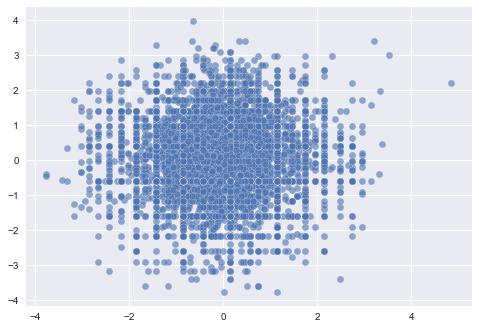

In [353]:
# plot pairwise rna_cnt_fold and rpf_cnt_fold. They should have no correlation.
plt.scatter(np.log2(df_wt['rna_cnt_fold']), np.log2(df_wt['rpf_cnt_fold']), alpha=0.6, edgecolor='white')
plt.show()

### Create a new dataframe containing translational efficiencies of the 5 samples for analysis.

In [326]:
te_all = pd.concat([df_mock[['id','name','te']], df_wt[['te']],df_n556d[['te']],df_hp[['te']],df_hn[['te']]], axis=1)
te_all.columns = ['id','name','mock_te','wt_te', 'n556d_te', 'hp_te', 'hn_te']
te_all.head(2)

,id,name,mock_te,wt_te,n556d_te,hp_te,hn_te
0,ENSG00000000003,TSPAN6,0.850347,0.778844,0.835753,0.785081,0.883207
1,ENSG00000000005,TNMD,NaN,NaN,NaN,NaN,NaN


In [297]:
te_all.to_csv('./translational_efficiency_all_samples.csv')

In [327]:
# Remove infinite and 0 data points.
te_all = te_all.replace([np.inf, -np.inf, 0.0], np.nan).dropna()

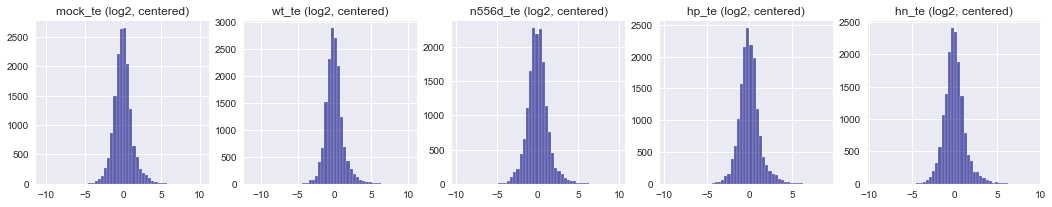

In [406]:
# Check the data distribution.
fig, axes = plt.subplots(nrows=1, ncols=5, sharey=False, figsize=(18,3))
for name, ax in zip(te_all.columns[2:], axes.flat):
    ax.hist(np.log2(te_all[name])-np.mean(np.log2(te_all[name])), 
            bins=50, alpha=0.6, color='navy', edgecolor='white')
    ax.set_title(name+' (log2, centered)')

plt.show()

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


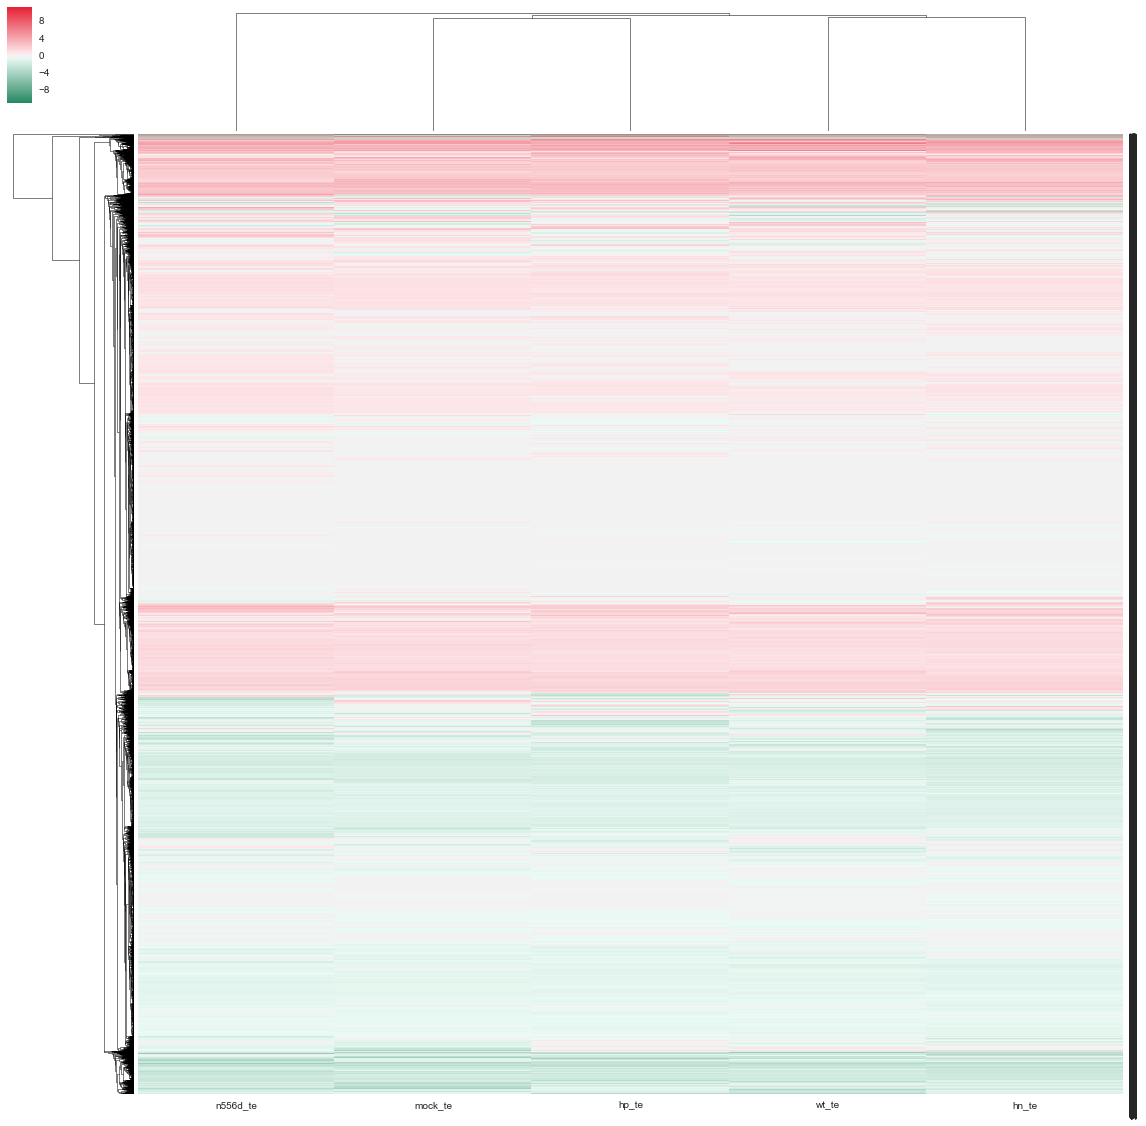

In [391]:
# Clustering the genes according to the translational efficiency features.
cmap = sns.diverging_palette(150, 10, n=9, s=90, l=50, center='light', as_cmap=True)
log2_cen = np.log2(te_all[['mock_te', 'wt_te', 'n556d_te', 'hp_te', 'hn_te']]) - np.mean(np.log2(te_all[['mock_te', 'wt_te', 'n556d_te', 'hp_te', 'hn_te']]))
clt_map2 = sns.clustermap(log2_cen, cmap=cmap, figsize=(20,20))
sns.plt.show()

In [392]:
clt_map2.savefig('./TE_cluster.png')

In [389]:
log2_cen = np.log2(te_all[['mock_te', 'wt_te', 'n556d_te', 'hp_te', 'hn_te']]) - np.mean(np.log2(te_all[['mock_te', 'wt_te', 'n556d_te', 'hp_te', 'hn_te']]))
log2_cen.head()

,mock_te,wt_te,n556d_te,hp_te,hn_te
0,0.169982,-0.042785,0.202183,0.017228,0.171795
2,0.666781,0.598832,0.745273,0.583277,0.374733
3,-0.444372,-0.714207,-0.296085,-0.550741,-0.548343
4,0.099671,-0.215679,-0.042407,0.243403,-0.125538
6,1.025074,0.936960,1.336049,1.174667,0.846817


### Calculate the fold changes of translational efficiencies and analyze the data.

In [223]:
# A function to calculate fold change of total RNA and translational efficiency, using mock as denominator.
def fold_changes(df, df_denominator):
    df['rna_cnt_fold'] = df['rna_cnt_norm']/df_denominator['rna_cnt_norm']
    df['rpf_cnt_fold'] = df['rpf_cnt_norm']/df_denominator['rpf_cnt_norm']
    df['te_fold'] = df['te']/df_denominator['te']
    return df

In [224]:
df_wt = fold_changes(df_wt,df_mock)
df_n556d = fold_changes(df_n556d,df_mock)
df_hp = fold_changes(df_hp,df_mock)
df_hn = fold_changes(df_hn,df_mock)

In [225]:
df_wt.head(2)

,id,name,rna_cnt,rpf_cnt,rna_cnt_norm,rpf_cnt_norm,te,rna_cnt_fold,rpf_cnt_fold,te_fold
0,ENSG00000000003,TSPAN6,996,1489,153.185521,119.307647,0.778844,1.05422,0.965574,0.915914
1,ENSG00000000005,TNMD,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN


In [279]:
te_fold_all = pd.concat([df_wt[['id','name','te_fold']],df_n556d[['te_fold']],df_hp[['te_fold']],df_hn[['te_fold']]], axis=1)
te_fold_all.columns = ['id','name','wt_te_fold', 'n556d_te_fold', 'hp_te_fold', 'hn_te_fold']
te_fold_all.head(2)

,id,name,wt_te_fold,n556d_te_fold,hp_te_fold,hn_te_fold
0,ENSG00000000003,TSPAN6,0.915914,0.982838,0.923248,1.038643
1,ENSG00000000005,TNMD,NaN,NaN,NaN,NaN


In [296]:
te_fold_all.to_csv('./translational_efficiency_fold_change.csv')

In [397]:
te_fold_all = te_fold_all.replace([np.inf, -np.inf, 0.0], np.nan).dropna()

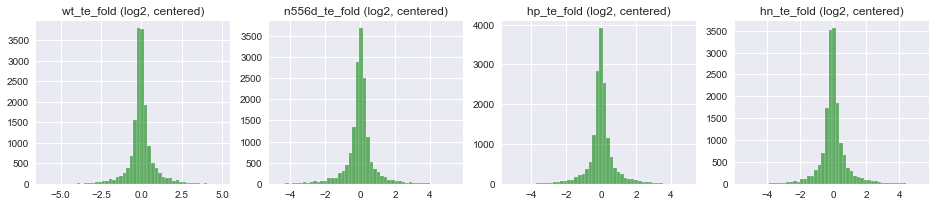

In [400]:
# Check the distribution of the data.
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=False, figsize=(16,3))
for name, ax in zip(te_fold_all.columns[2:], axes.flat):
    ax.hist(np.log2(te_fold_all[name])-np.mean(np.log2(te_fold_all[name])), 
                    bins=50, alpha=0.6, color='green', edgecolor='white')
    ax.set_title(name+' (log2, centered)')

plt.show()

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


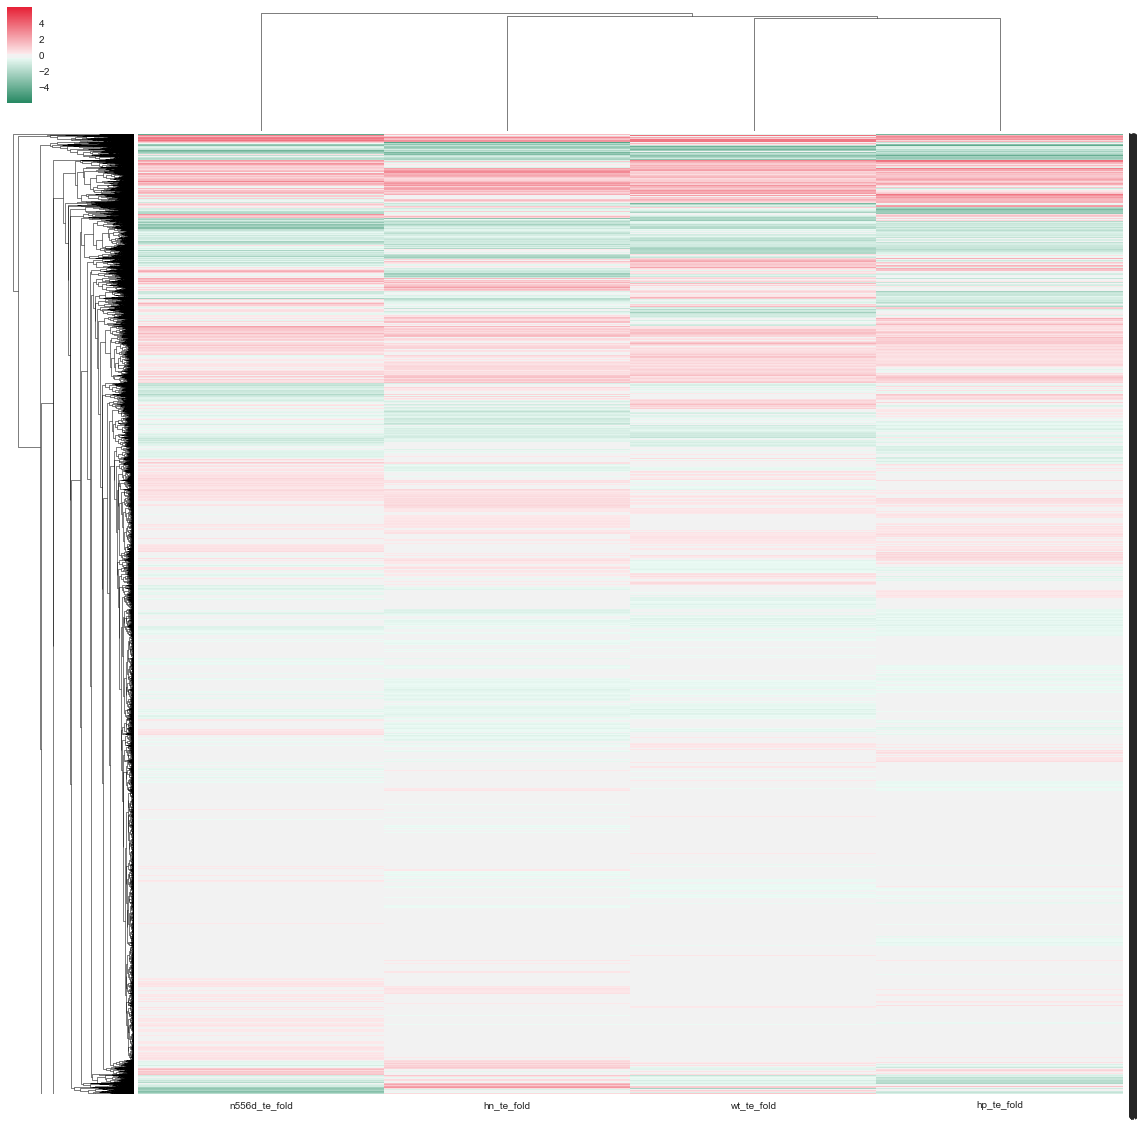

In [401]:
#Cluster the genes according to the fold changes of the translational efficiencies.
cmap = sns.diverging_palette(150, 10, n=9, s=90, l=50, center='light', as_cmap=True)
log2_cen = np.log2(te_fold_all[['wt_te_fold', 'n556d_te_fold', 'hp_te_fold', 'hn_te_fold']]) - np.mean(np.log2(te_fold_all[['wt_te_fold', 'n556d_te_fold', 'hp_te_fold', 'hn_te_fold']]))
clt_map = sns.clustermap(log2_cen, cmap=cmap, figsize=(20,20))
sns.plt.show()

In [324]:
clt_map.savefig('./TE_fold_change_map.png')

In [308]:
from sklearn.cluster import KMeans

In [309]:
kmeans = FastICA(n_components=None)
fica.fit(te_fold_all[['wt_te_fold', 'n556d_te_fold', 'hp_te_fold', 'hn_te_fold']])

/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

array([[ 0.0073893 , -0.00123867, -0.0014282 , -0.00129315],
       [ 0.00098627, -0.00775526,  0.00081391,  0.00086894],
       [-0.00073658, -0.00146655,  0.00827239, -0.00119265],
       [-0.0012399 , -0.00122796, -0.00116678,  0.0072765 ]])

array([[ 149.76164622,  -36.25793091,   34.58747012,   36.61397345],
       [  25.16000445, -141.00986808,   21.72560702,   24.87134581],
       [  22.60929836,  -33.31875023,  132.25091157,   29.67330151],
       [  33.39036761,  -35.31728621,   30.76628775,  152.62290739]])